In [11]:
import pandas as pd 
import numpy as np
import dask.dataframe as dd

# parallelize the work using dask
from dask.distributed import Client
client = Client()

#for not having the output truncated
n=100 #number of rows to print
pd.set_option('display.max_rows', n)

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43379 instead
  warnings.warn(


In [2]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 3.72 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43773,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 3.72 GiB
Comm: tcp://127.0.0.1:40575,Total threads: 2
Dashboard: http://127.0.0.1:40509/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:34491,


In [3]:
#df_demo = dd.read_csv(r"./demo_Z0.00014/output_*.csv", dtype={'BEvent': float})
#"/home/albertos/Astro_data/demo_Z0.00014/output_0.csv"
#df0 = dd.read_csv("./Z0.02_a3_cM70/output_0.csv", dtype={'BEvent': float})
df0 = dd.read_csv("/home/albertos/Astro_data/demo_Z0.00014/output_0.csv", dtype={'BEvent': float})


In [4]:
df0

,ID,name,Mass_0,Radius_0,Phase_0,PhaseBSE_0,RemnantType_0,Hsup_0,Mass_1,Radius_1,Phase_1,PhaseBSE_1,RemnantType_1,Hsup_1,Semimajor,Eccentricity,BWorldtime,Period,GWtime,RL0,RL1,BEvent
npartitions=38,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,float64,float64,int64,float64,int64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Wolf Rayet - Black Hole systems

In [5]:
df0_WRBH = df0.loc[( ((df0.PhaseBSE_0==8) | (df0.PhaseBSE_0==7)) & (df0.PhaseBSE_1==14.0) ) | ( ((df0.PhaseBSE_1==8) | (df0.PhaseBSE_1==7)) & (df0.PhaseBSE_0==14.0) )]
data_WRBH = df0_WRBH[['ID', 'Mass_0', 'Mass_1', 'Semimajor', 'Eccentricity']].drop_duplicates('ID').compute()
id0_WRBH = data_WRBH['ID']

2024-05-17 11:10:52,770 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 99fbbaaa2c383b3fbcb2720df6821b22 initialized by task ('shuffle-transfer-99fbbaaa2c383b3fbcb2720df6821b22', 9) executed on worker tcp://127.0.0.1:42657
2024-05-17 11:11:12,718 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 99fbbaaa2c383b3fbcb2720df6821b22 deactivated due to stimulus 'task-finished-1715937072.7141774'
2024-05-17 11:15:35,202 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 6f10b5b6f98ab0fa10efb33d12878fd6 initialized by task ('shuffle-transfer-6f10b5b6f98ab0fa10efb33d12878fd6', 35) executed on worker tcp://127.0.0.1:41811
2024-05-17 11:15:35,280 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 3d83853e24357e4a6c90a55e786666fe initialized by task ('shuffle-transfer-3d83853e24357e4a6c90a55e786666fe', 9) executed on worker tcp://127.0.0.1:42657
2024-05-17 11:15:36,169 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle a0357083665be0478f7d1bdc77f135

### GW BBH merge

In [32]:
#selecting ID of systems of binary black holes that merge via GW emission in less than the age of the universe
id0_GW = df0.loc[((df0.PhaseBSE_0 == 14.0) & (df0.PhaseBSE_1 == 14.0) & ((df0.GWtime + df0.BWorldtime) < int(14e+03)))]['ID'].drop_duplicates().compute()

2024-05-17 11:59:26,152 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 757.90 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:59:26,466 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 733.37 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:59:39,890 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. 

In [33]:
id0_both = np.intersect1d(id0_WRBH, id0_GW)

In [34]:
print('Binary systems of a Wolf-Rayet and a Black Hole: ', len(id0_WRBH))
print('Binary black holes systems that merge via GW: ', len(id0_GW))
print('Binary systems that evolve from a WR-BH and merge via GW: ', len(id0_both))

Binary systems of a Wolf-Rayet and a Black Hole:  4528
Binary black holes systems that merge via GW:  857
Binary systems that evolve from a WR-BH and merge via GW:  718


### Mass transfer events

In [19]:
#selecting ID of MT stable events
df0_WRBH_stable = df0_WRBH.loc[df0_WRBH['BEvent']==5, ['ID','BEvent']].groupby('ID').count().reset_index()

In [20]:
#selecting ID of MT unstable events
df0_WRBH_unstable = df0_WRBH.loc[(df0_WRBH['BEvent']==7) | (df0_WRBH['BEvent']==11), ['ID','BEvent']].groupby('ID').count().reset_index()

In [21]:
df0_WRBH_unstable.head(10)

2024-05-17 11:28:35,293 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 642.35 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:28:47,715 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 647.25 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:29:02,135 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. 

,ID,BEvent
0,30101,1
1,300021,1
2,340224,1
3,420159,1
4,480024,1
5,530244,1
6,660089,1
7,710130,1
8,930002,1
9,1210180,1


In [22]:
#merging the two tables
mass_transfer0 = df0_WRBH_stable.merge(df0_WRBH_unstable, how='outer', on='ID').rename(columns={'BEvent_x': 'MTEvents_stable', 'BEvent_y': 'MTEvents_unstable'})

#sustituting NA values with zeros
mass_transfer0['MTEvents_unstable'] = mass_transfer0['MTEvents_unstable'].fillna(0).astype(int)
mass_transfer0['MTEvents_stable'] = mass_transfer0['MTEvents_stable'].fillna(0).astype(int)


In [23]:
mass_transfer0.head(10)

2024-05-17 11:29:51,796 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 699.76 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:29:53,013 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 650.70 MiB -- Worker memory limit: 0.93 GiB


,ID,MTEvents_stable,MTEvents_unstable
0,168,1,0
1,20035,1,0
2,20180,1,0
3,20191,1,0
4,30101,1,1
5,60181,1,0
6,70086,1,0
7,100061,1,0
8,100136,1,0
9,100220,1,0


In [24]:
data_0 = mass_transfer0.merge(data_WRBH, how='inner', on='ID')
data_0.compute()

2024-05-17 11:30:34,550 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 576.26 MiB -- Worker memory limit: 0.93 GiB
2024-05-17 11:30:41,160 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 691.22 MiB -- Worker memory limit: 0.93 GiB


,ID,MTEvents_stable,MTEvents_unstable,Mass_0,Mass_1,Semimajor,Eccentricity
0,168,1,0,23.354500,6.591192,180.929100,0.0
1,20035,1,0,30.976930,3.243112,175.285900,0.0
2,20180,1,0,27.989800,31.535930,87.200250,0.0
3,20191,1,0,7.899304,1.855098,156.832300,0.0
4,30101,1,1,7.660972,6.478589,3.447502,0.0
...,...,...,...,...,...,...,...
1369,4160121,1,0,29.319500,24.556420,15.491870,0.0
1370,4160208,1,0,12.700630,2.416691,110.598800,0.0
1371,4160210,1,0,34.778260,2.922909,153.629800,0.0
1372,4170018,1,0,14.201540,7.609534,5.095123,0.0


In [63]:
#adding column which says if the system merge
col = data_0['ID'].isin(id0_both).astype(int)

data_0 = data_0.assign(Merge=col)


In [64]:
data_0.head(20)

,ID,MTEvents_stable,MTEvents_unstable,Mass_0,Mass_1,Semimajor,Eccentricity,Merge
0,168,1,0,23.354500,6.591192,180.929100,0.0,0
1,20035,1,0,30.976930,3.243112,175.285900,0.0,0
2,20180,1,0,27.989800,31.535930,87.200250,0.0,0
3,20191,1,0,7.899304,1.855098,156.832300,0.0,0
4,30101,1,1,7.660972,6.478589,3.447502,0.0,0
5,60181,1,0,44.117960,32.737230,233.178300,0.0,0
6,70086,1,0,15.769660,16.103900,16.036970,0.0,1
7,100061,1,0,25.767970,4.125337,113.783600,0.0,0
8,100136,1,0,22.181410,7.094860,105.492900,0.0,0
9,100220,1,0,27.427740,4.723193,226.656900,0.0,0


In [67]:
#Saving the output
data_0.to_csv('./out.csv', index=False)  

## PLOTTING

In [68]:
import matplotlib.pyplot as plt

#loading the output
df = pd.read_csv('out.csv')

In [69]:
df

,ID,MTEvents_stable,MTEvents_unstable,Mass_0,Mass_1,Semimajor,Eccentricity,Merge
0,168,1,0,23.354500,6.591192,180.929100,0.0,0
1,20035,1,0,30.976930,3.243112,175.285900,0.0,0
2,20180,1,0,27.989800,31.535930,87.200250,0.0,0
3,20191,1,0,7.899304,1.855098,156.832300,0.0,0
4,30101,1,1,7.660972,6.478589,3.447502,0.0,0
...,...,...,...,...,...,...,...,...
2693,4160121,1,0,29.319500,24.556420,15.491870,0.0,1
2694,4160208,1,0,12.700630,2.416691,110.598800,0.0,0
2695,4160210,1,0,34.778260,2.922909,153.629800,0.0,0
2696,4170018,1,0,14.201540,7.609534,5.095123,0.0,0


Text(0.5, 1.0, 'Scatter plot of Mass_0 vs Mass_1')

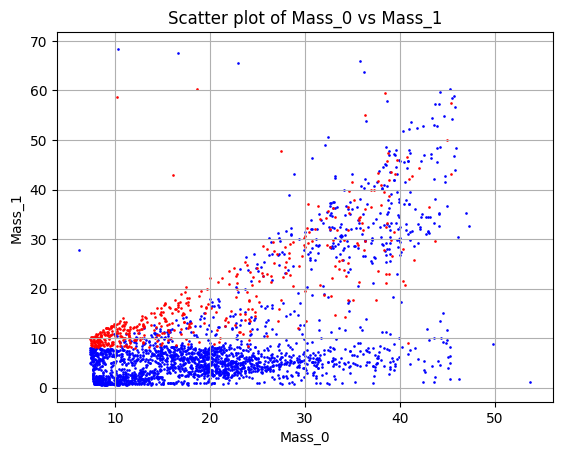

In [80]:
df_merge_0 = df[df['Merge'] == 0]
df_merge_1 = df[df['Merge'] == 1]

# Create a scatter plot for each subset of the data
plt.scatter(df_merge_0['Mass_0'], df_merge_0['Mass_1'], s=0.8, c='blue', label='Merge=0')
plt.scatter(df_merge_1['Mass_0'], df_merge_1['Mass_1'], s=0.8, c='red', label='Merge=1')

# Add labels and title
plt.xlabel('Mass_0')
plt.ylabel('Mass_1')
plt.title('Scatter plot of Mass_0 vs Mass_1')

array([[<Axes: title={'center': 'Semimajor'}>]], dtype=object)

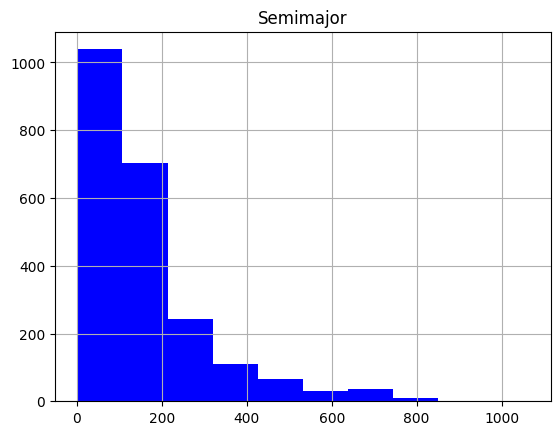

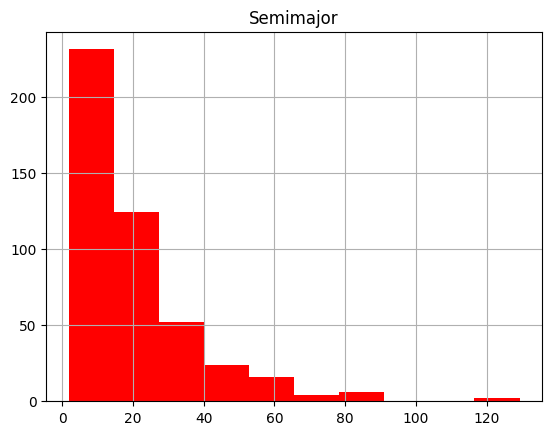

In [94]:
#semimajor distribution for merging and non merging systems
df_merge_0.hist(column='Semimajor', color='blue', label='No merge')
df_merge_1.hist(column='Semimajor', color='red', label='Merge')

([], [])

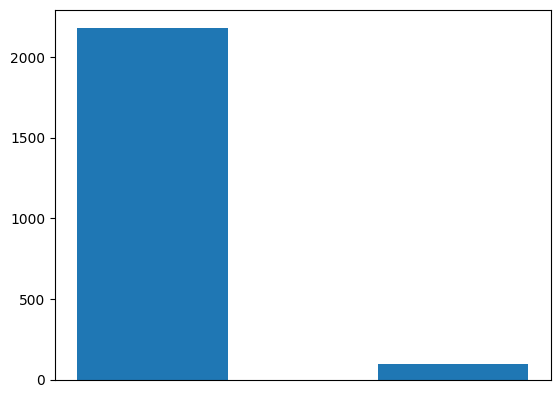

In [103]:
#frequency of stable and unstable mass transfer events for merging systems
count_stable = df_merge_0.MTEvents_stable.sum()
count_unstable = df_merge_0.MTEvents_unstable.sum()

plt.bar([0,0.2], [count_stable, count_unstable], width=0.1) #valori a caso per le x giusto da averli separati

plt.xticks([])


([], [])

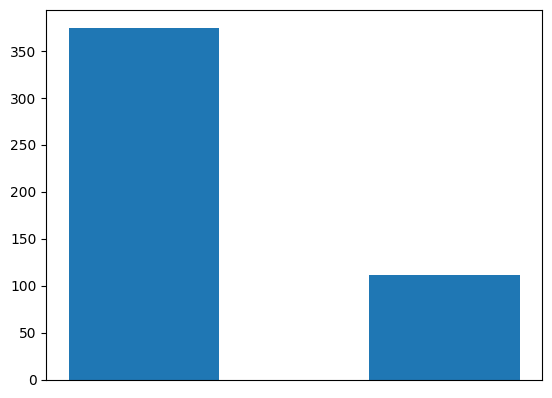

In [102]:
#frequency of stable and unstable mass transfer events for non-merging systems

count_stable = df_merge_1.MTEvents_stable.sum()
count_unstable = df_merge_1.MTEvents_unstable.sum()

plt.bar([0,0.2], [count_stable, count_unstable], width=0.1) #valori a caso per le x giusto da averli separati

plt.xticks([])